### Module 2 Practice

### Read car fuel efficiency data

In [101]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np
import random
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [102]:
# Ensure all columns are displayed side by side
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [103]:
#This works too
"""
import pandas as pd
data1 = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
df = pd.read_csv(data1)
print(df.head())
"""

"\nimport pandas as pd\ndata1 = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'\ndf = pd.read_csv(data1)\nprint(df.head())\n"

In [104]:

# link I copied from Alexey github repo 
'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv'

# edited and used below
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data

--2025-11-04 12:12:49--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.006s  

2025-11-04 12:12:49 (224 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [105]:
df = pd.read_csv('data.csv')
print(df.head())

  Make       Model  Year             Engine Fuel Type  Engine HP  Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors                        Market Category Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP
0  BMW  1 Series M  2011  premium unleaded (required)      335.0               6.0            MANUAL  rear wheel drive              2.0  Factory Tuner,Luxury,High-Performance      Compact         Coupe           26        19        3916  46135
1  BMW    1 Series  2011  premium unleaded (required)      300.0               6.0            MANUAL  rear wheel drive              2.0                     Luxury,Performance      Compact   Convertible           28        19        3916  40650
2  BMW    1 Series  2011  premium unleaded (required)      300.0               6.0            MANUAL  rear wheel drive              2.0                Luxury,High-Performance      Compact         Coupe           28        20        3916  36350
3  BMW    1 Series  2011

In [106]:
# changing columns to lower case and replacing the empty spaces with uderscore
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [107]:
# getting list of columns with string data type as there value as we have inconsistencies with the value character.
# some all Caps while some are all lower cases.

strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [108]:
# then  
for col in strings:
    df[col] = df[col].str.lower().replace(' ', '_')
df[col]

0                coupe
1          convertible
2                coupe
3                coupe
4          convertible
             ...      
11909    4dr hatchback
11910    4dr hatchback
11911    4dr hatchback
11912    4dr hatchback
11913            sedan
Name: vehicle_style, Length: 11914, dtype: object

In [109]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [110]:
# checking for unique values in our columns
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()


make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1 series m' '1 series' '100' '124 spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### EDA
##### Look at the fuel_efficiency_mpg variable. Does it have a long tail?

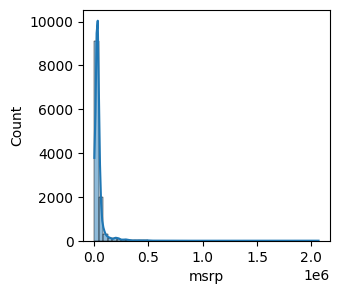

In [111]:
# Plot histogram and boxplot
plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
sns.histplot(df.msrp, kde=True, bins=50)
plt.show()

#### Outliers exist but do not dominate or stretch the data in one direction. So there is no long tail problem.

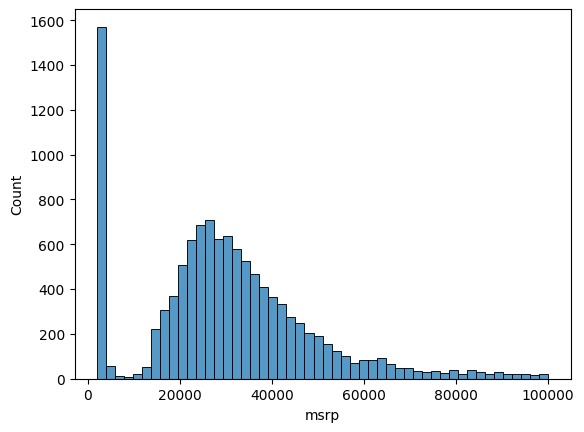

In [112]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.show()

In [113]:
# want to get rid of the long tail by applying logrithm.
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [114]:
price_logs = np.log1p(df.msrp)


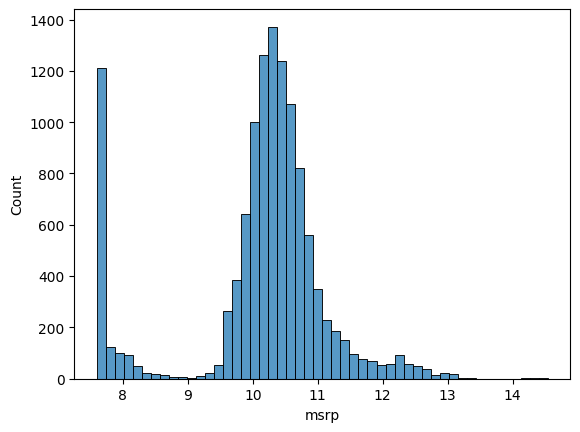

In [115]:
sns.histplot(price_logs, bins=50)
plt.show()

In [116]:
# let's check for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [117]:
# Let's do Dataset partitioning
n = len(df)
n_test = int(n*0.2)
n_val = int(n*0.2)
n_train = int(n-n_val-n_test)

In [118]:
n,n_train+n_val+n_test

(11914, 11914)

In [119]:
n_train, n_val, n_test

(7150, 2382, 2382)

In [120]:
# Index-based data partitioning
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [121]:
# randomized data split
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]


In [122]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

In [123]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular unleaded,148.0,4.0,manual,front wheel drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular unleaded,132.0,4.0,automatic,front wheel drive,4.0,hatchback,compact,4dr hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular unleaded,148.0,4.0,automatic,all wheel drive,4.0,hatchback,compact,4dr hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular unleaded,90.0,4.0,manual,rear wheel drive,3.0,NaN,large,passenger minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel (unleaded/e85),385.0,8.0,automatic,four wheel drive,4.0,flex fuel,large,crew cab pickup,21,15,5657,56260


In [124]:
# Index normalization (index resetting) after dataset partitioning
# dropping the old and confusing index for propper indexing
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [125]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular unleaded,148.0,4.0,manual,front wheel drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular unleaded,132.0,4.0,automatic,front wheel drive,4.0,hatchback,compact,4dr hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular unleaded,148.0,4.0,automatic,all wheel drive,4.0,hatchback,compact,4dr hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular unleaded,90.0,4.0,manual,rear wheel drive,3.0,NaN,large,passenger minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel (unleaded/e85),385.0,8.0,automatic,four wheel drive,4.0,flex fuel,large,crew cab pickup,21,15,5657,56260


In [126]:
# Log transformation of the target variable
# applying a logarithmic transformation to the target column (msrp) before model training.
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [127]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [128]:
# removing the target variable from the feature set
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [129]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom drophead coupe
year                                        2015
engine_fuel_type     premium unleaded (required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear wheel drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [130]:
# Linear combination of features (core of Linear Regression prediction)
xi = [453,11,86]
w = [0.01,0.04,0.002]
n = len(xi)
w0 = 7.17

def linear_regression(xi):
    pred = w0
    for j in np.arange(n):
        pred = pred + w[j] * xi[j]
    return pred

In [131]:
linear_regression(xi)

12.312

In [132]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [133]:
np.log1p(222347.2221101062)

np.float64(12.312)

### Linear regression vector form

In [134]:

def dot (xi, w):
        n = len(xi)

        res = 0.0
        for j in np.arange(n):
            res = res + w[j] * xi[j]
        return res

In [135]:
def linear_regression(xi):
        return w0 + dot(xi, w)
n_new = [w0] + w

n_new

[7.17, 0.01, 0.04, 0.002]

In [136]:
def linear_regression(xi):
    xi = [1] + (xi)
    return dot(xi, n_new)
linear_regression(xi)

12.312

In [137]:
# working with more observations
x1 = [1, 145, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

x = [x1, x2, x10]
x = np.array(x)
x

array([[   1,  145,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [138]:
def linear_regression(x):
    return x.dot(n_new)
linear_regression(x)

array([12.35 , 13.552, 12.312])

In [139]:
def train_linear_regression(x, y):
    pass

x = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 85],
    [145, 24, 185],
    [172, 25, 201],
    [413, 11, 84],
    [38, 54, 185],
    [142, 25, 438],
    [453, 31, 86],
]

x = np.array(x)
x

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   85],
       [ 145,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   84],
       [  38,   54,  185],
       [ 142,   25,  438],
       [ 453,   31,   86]])

In [140]:
y = ([22000, 18000, 27000, 20000, 25000, 26000, 15000, 23000, 28000])
y

[22000, 18000, 27000, 20000, 25000, 26000, 15000, 23000, 28000]

In [141]:
ones = np.ones(x.shape[0])
x = np.column_stack([ones, x])
x

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.500e+01],
       [1.000e+00, 1.450e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.400e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.380e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [142]:
xTx = x.T.dot(x)
xTx_inv = np.linalg.inv(xTx)
w_full = xTx_inv.dot(x.T).dot(y)
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(22218.637333198236),
 array([  16.29094764, -107.29270619,   -1.16158971]))

In [143]:
x = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 85],
    [145, 24, 185],
    [172, 25, 201],
    [413, 11, 84],
    [38, 54, 185],
    [142, 25, 438],
    [453, 31, 86],
]

y = ([22000, 18000, 27000, 20000, 25000, 26000, 15000, 23000, 28000])

In [144]:
def train_linear_regression(x, y):
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones, x])
    
    xtx = x.T.dot(x)
    xtx_inv = np.linalg.inv(xtx) 
    w_full = xtx_inv.dot(x.T).dot(y)
    return w_full[0], w_full[1:]

In [145]:
train_linear_regression(x, y)


AttributeError: 'list' object has no attribute 'shape'

### Working on baseline model with the real dataset

In [ ]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [ ]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp', 'engine_cylinders', 'transmission_type', 'driven_wheels', 'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style', 'highway_mpg', 'city_mpg', 'popularity', 'msrp'], dtype='object')

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [ ]:
x_train = df_train[base].values
x_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [ ]:
y_train

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

In [ ]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [ ]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [ ]:
x_train = df_train[base].fillna(0).values
x_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [146]:
w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_train.dot(w)

<Axes: ylabel='Count'>

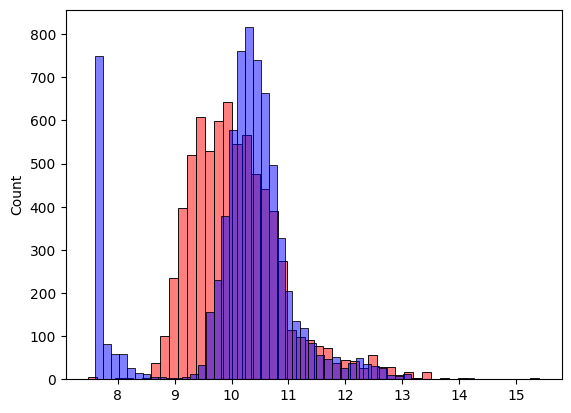

In [152]:
sns.histplot(y_pred, alpha = 0.5, color='red', bins=50)
sns.histplot(y_train, alpha = 0.5,color='blue', bins=50)

### Mean Square Error(RMSE)

In [ ]:

# checking for differences between predicted values and actual values
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse) 

rmse(y_train, y_pred)  # should be close to 0

np.float64(0.7554192603920132)

### Validating the Model

In [159]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]

x_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_train.dot(w)

In [160]:
def prepare_x(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    x = df_num.values
    return x

In [161]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.7616530991301627)

### Simple Feature Engineering

In [166]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular unleaded,148.0,4.0,manual,front wheel drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular unleaded,132.0,4.0,automatic,front wheel drive,4.0,hatchback,compact,4dr hatchback,32,25,2031
2,subaru,impreza,2016,regular unleaded,148.0,4.0,automatic,all wheel drive,4.0,hatchback,compact,4dr hatchback,37,28,640
3,volkswagen,vanagon,1991,regular unleaded,90.0,4.0,manual,rear wheel drive,3.0,NaN,large,passenger minivan,18,16,873
4,ford,f-150,2017,flex-fuel (unleaded/e85),385.0,8.0,automatic,four wheel drive,4.0,flex fuel,large,crew cab pickup,21,15,5657


In [ ]:
df_train['year'].max()

np.int64(2017)

In [168]:
2017 - df_train['year']

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [ ]:
# Define a new feature preparation function
def prepare_x(df):
    df = df.copy() # make a copy of the dataframe to avoid modifying the original
    df['age'] = 2017 - df['year'] # create a new column 'age' to introduce the age feature
    feature = base + ['age']
    df_num = df[feature]
    df_num = df_num.fillna(0)
    x = df_num.values
    return x

In [ ]:
# Train and Validate the model
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)

x_val = prepare_x(df_val) 
y_pred = w0 + x_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5172055461058327)

<Axes: ylabel='Count'>

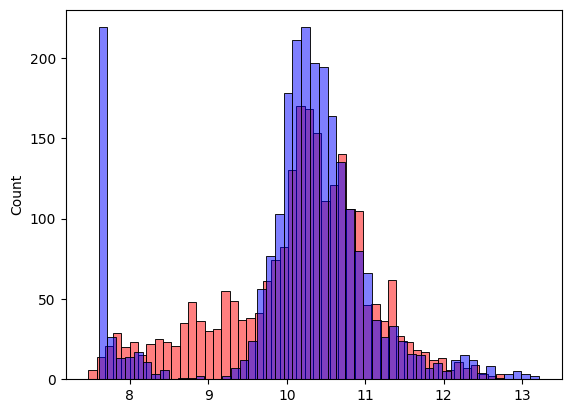

In [172]:
sns.histplot(y_pred, alpha = 0.5, color='red', bins=50)
sns.histplot(y_val, alpha = 0.5,color='blue', bins=50)